In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import multiprocessing as multi

In [58]:
dpi = 120

In [39]:
%%capture PC_name 
!hostname

In [40]:
#setting dots per inch for images
dpi = 90

#setting number of processors for multiprocessing
PC_name_str = PC_name.stdout[0:-2]

if PC_name_str == 'science12'or PC_name_str == 'science11' or PC_name_str == 'science10':
    cores = 42        
else:
    cores = multi.cpu_count()

print(PC_name_str)
print(cores)

science10
42


In [3]:
data_address = '../Data/'
df_clusters_orig = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 'vz[km/s]' ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


(array([3249., 1331.,  626.,  154.,  677.,   36.,    5.]), array([3.e+13, 5.e+13, 7.e+13, 9.e+13, 1.e+14, 3.e+14, 5.e+14, 7.e+14]), <BarContainer object of 7 artists>)


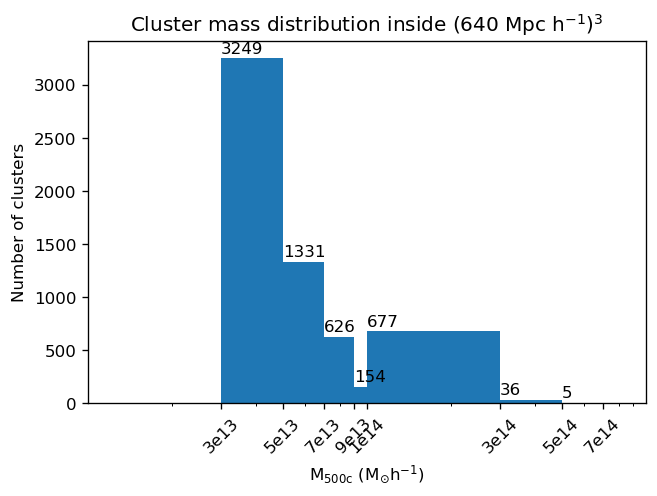

In [4]:
plt.figure(dpi = dpi)

bins = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins = ['3e13', '5e13', '7e13', '9e13', '1e14', '3e14', '5e14', '7e14']
plt.xticks(hist_data[1], bins, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+50,str(int(hist_data[0][i])));

In [5]:
np.geomspace(3e13, 7e14, num = 8)

array([3.00000000e+13, 4.70485789e+13, 7.37856258e+13, 1.15716961e+14,
       1.81477286e+14, 2.84608279e+14, 4.46347169e+14, 7.00000000e+14])

(array([2933., 1803.,  833.,  330.,  130.,   39.,   10.]), array([3.00000000e+13, 4.70485789e+13, 7.37856258e+13, 1.15716961e+14,
       1.81477286e+14, 2.84608279e+14, 4.46347169e+14, 7.00000000e+14]), <BarContainer object of 7 artists>)


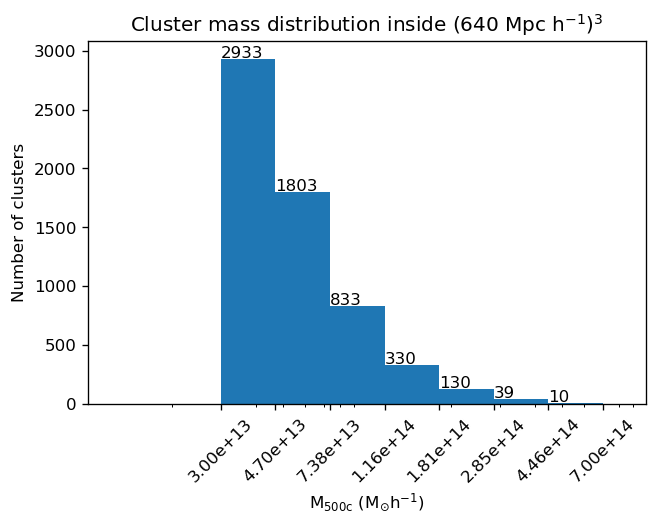

In [6]:
plt.figure(dpi = dpi)

bins = np.geomspace(3e13, 7e14, num = 8)
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins_str = ['{:.2e}'.format(i) for i in bins]
plt.xticks(hist_data[1], bins_str, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+10,str(int(hist_data[0][i])));

In [7]:
df_clusters_temp = df_clusters_orig.copy()

df_clusters_big = pd.DataFrame()

for k in range(3):
    for i in range(3):
        for j in range(0,3):

            df_clusters_temp['x[kpc/h]'] = df_clusters_orig['x[kpc/h]'] + (640000 * i)
            df_clusters_temp['y[kpc/h]'] = df_clusters_orig['y[kpc/h]'] + (640000 * j)
            df_clusters_temp['z[kpc/h]'] = df_clusters_orig['z[kpc/h]'] + (640000 * k)

            df_clusters_big = df_clusters_big.append(df_clusters_temp)

df_clusters_big.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,1.641600e+05,1.641600e+05,1.641600e+05,1.641600e+05,164160.000000,164160.000000,164160.000000
mean,9.664164e+05,9.620554e+05,9.613082e+05,6.356245e+13,2.109102,-1.647297,-4.296055
std,5.546773e+05,5.535561e+05,5.538918e+05,4.851314e+13,316.039508,306.202286,286.431703
min,1.916329e+01,1.526539e+02,8.737095e+01,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,4.863366e+05,4.736062e+05,4.789278e+05,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,9.788846e+05,9.732743e+05,9.621101e+05,4.801630e+13,-3.619450,1.969450,-8.055475
75%,1.440918e+06,1.444771e+06,1.441655e+06,6.945502e+13,206.816750,207.755750,181.532000
max,1.919888e+06,1.919933e+06,1.919848e+06,7.438200e+14,1197.640000,1164.960000,1201.260000


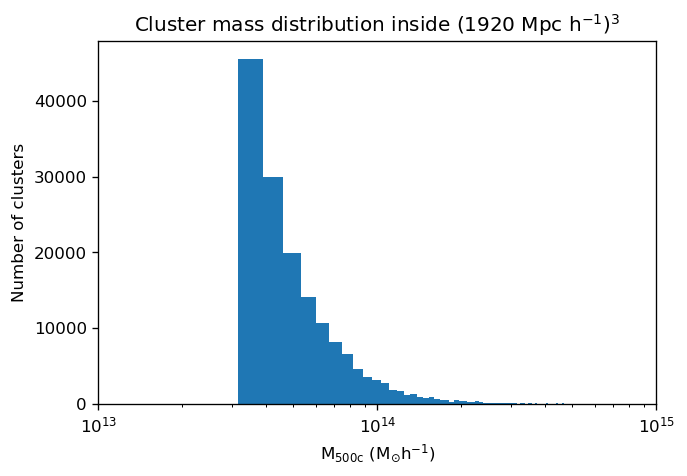

In [8]:
plt.figure(dpi = dpi)
plt.hist(df_clusters_big['m500c[Msol/h]'],  bins = 100)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (1920 Mpc h$^{-1}$)$^3$');

In [9]:
low_bound = 640000
upp_bound = 640000 * 2  #128000

df_clusters_center = df_clusters_big[(df_clusters_big['x[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['x[kpc/h]'] < upp_bound) & 
                                     (df_clusters_big['y[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['y[kpc/h]'] < upp_bound) & 
                                     (df_clusters_big['z[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['z[kpc/h]'] < upp_bound)]

df_clusters_center.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6.080000e+03,6.080000e+03,6.080000e+03,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,9.664164e+05,9.620554e+05,9.613082e+05,6.356245e+13,2.109102,-1.647297,-4.296055
std,1.860216e+05,1.826509e+05,1.836659e+05,4.851698e+13,316.064539,306.226537,286.454388
min,6.400192e+05,6.401527e+05,6.400874e+05,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,8.009786e+05,8.047934e+05,8.018639e+05,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,9.788846e+05,9.732743e+05,9.621101e+05,4.801630e+13,-3.619450,1.969450,-8.055475
75%,1.126228e+06,1.113557e+06,1.118894e+06,6.945502e+13,206.816750,207.755750,181.532000
max,1.279888e+06,1.279933e+06,1.279848e+06,7.438200e+14,1197.640000,1164.960000,1201.260000


In [10]:
df_gal_orig = pd.read_csv(data_address + 'massive_galaxies.csv')      #massive_galaxies.csv contains galaxies with mass greater than 1.8 ×10^{11} h^{−1} M_sun as done by Tanimura et al. (2020)
df_gal_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],m_gas[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,93097.000000,93097.000000,93097.000000,9.309700e+04,9.309700e+04,93097.000000,93097.000000,93097.000000
mean,325576.133087,322500.028738,320613.762863,3.993206e+11,1.326202e+12,0.763965,0.349477,-0.509183
std,184863.273960,182799.587421,183249.915097,3.995129e+11,2.955465e+12,351.345586,343.572230,328.125457
min,1.864417,10.164207,0.260974,1.800010e+11,0.000000e+00,-2896.388700,-2323.086700,-2275.444800
25%,163866.950000,166201.380000,162514.560000,2.161480e+11,2.976010e+11,-219.363920,-215.157970,-201.740720
50%,332449.620000,329260.160000,319925.780000,2.784900e+11,5.810010e+11,-2.822351,2.646382,-3.028148
75%,483949.000000,475466.120000,478698.410000,4.192930e+11,1.244070e+12,216.770710,214.257250,200.506210
max,639996.190000,639980.940000,639993.120000,1.077460e+13,1.420090e+14,2423.330800,3048.129900,2638.449000


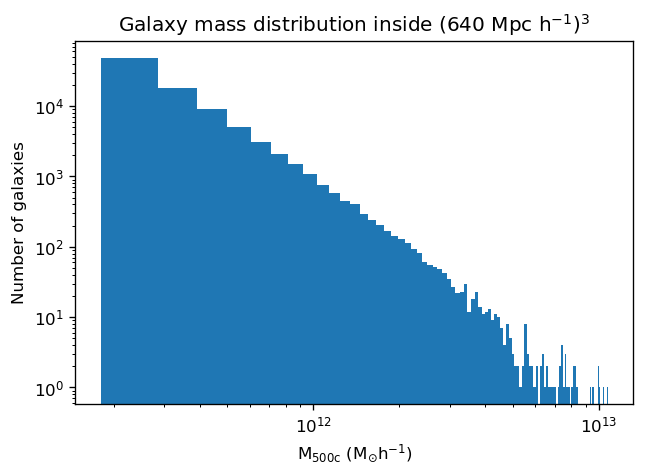

In [11]:
plt.figure(dpi = dpi)

bins = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
hist_data = plt.hist(df_gal_orig['m[Msol/h]'], bins = 100)
# hist_data = plt.hist(df_gal_orig['m[Msol/h]'],  bins = bins)
# plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of galaxies')
plt.title('Galaxy mass distribution inside (640 Mpc h$^{-1}$)$^3$');

# bins = ['3e13', '5e13', '7e13', '9e13', '1e14', '3e14', '5e14', '7e14']
# plt.xticks(hist_data[1], bins, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
# print(hist_data)
# for i in range(len(hist_data[0])):
#     plt.text(hist_data[1][i],hist_data[0][i]+50,str(int(hist_data[0][i])));

In [12]:
df_gal_temp = df_gal_orig.copy()

df_gal_big = pd.DataFrame()

for k in range(3):
    for i in range(3):
        for j in range(0,3):

            df_gal_temp['x[kpc/h]'] = df_gal_orig['x[kpc/h]'] + (640000 * i)
            df_gal_temp['y[kpc/h]'] = df_gal_orig['y[kpc/h]'] + (640000 * j)
            df_gal_temp['z[kpc/h]'] = df_gal_orig['z[kpc/h]'] + (640000 * k)

            df_gal_big = df_gal_big.append(df_gal_temp)

df_gal_big.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],m_gas[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06
mean,9.655761e+05,9.625000e+05,9.606138e+05,3.993206e+11,1.326202e+12,7.639653e-01,3.494774e-01,-5.091831e-01
std,5.542931e+05,5.536083e+05,5.537571e+05,3.995109e+11,2.955449e+12,3.513438e+02,3.435705e+02,3.281238e+02
min,1.864417e+00,1.016421e+01,2.609741e-01,1.800010e+11,0.000000e+00,-2.896389e+03,-2.323087e+03,-2.275445e+03
25%,4.839490e+05,4.754661e+05,4.786984e+05,2.161480e+11,2.976010e+11,-2.193639e+02,-2.151580e+02,-2.017407e+02
50%,9.724496e+05,9.692602e+05,9.599258e+05,2.784900e+11,5.810010e+11,-2.822351e+00,2.646382e+00,-3.028148e+00
75%,1.443867e+06,1.446201e+06,1.442515e+06,4.192930e+11,1.244070e+12,2.167707e+02,2.142572e+02,2.005062e+02
max,1.919996e+06,1.919981e+06,1.919993e+06,1.077460e+13,1.420090e+14,2.423331e+03,3.048130e+03,2.638449e+03


In [54]:
def no_of_gals_bins(gray_shade, low_lim, upper_lim, df_clusters_inner, radi, max_extent):
    
        
    v_disp = np.zeros((n_clusters, radi.shape[0]))
    gal_no = np.zeros((n_clusters, radi.shape[0]-1))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, random_state = 0)    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                                        df_gal_cube['y_shift[kpc/h]']**2 +
                                                        df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi[:-1]):

            df_gal_sphere = df_gal_cube[(df_gal_cube['dist_from_clus'] >= radi[i]) & 
                                        (df_gal_cube['dist_from_clus'] < radi[i+1])]
            
            gal_no[j,i] = len(df_gal_sphere)

    
    return gal_no.mean(axis = 0), low_lim, upper_lim
#     plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, gal_no.mean(axis = 0), 
# #              c = gray_shade,
#              label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
    

CPU times: user 2min 12s, sys: 1.67 s, total: 2min 13s
Wall time: 49 s


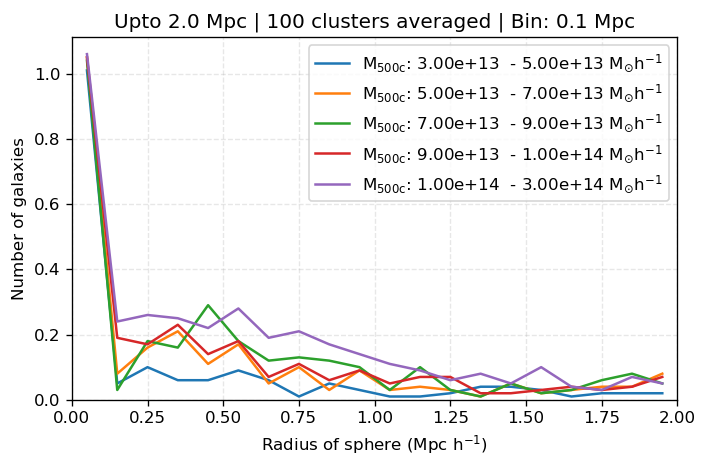

In [36]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(0, max_extent + 1, 100)

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] >= mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    no_of_gals_bins(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
plt.ylim(0,)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 2min 40s, sys: 2.37 s, total: 2min 42s
Wall time: 55.4 s


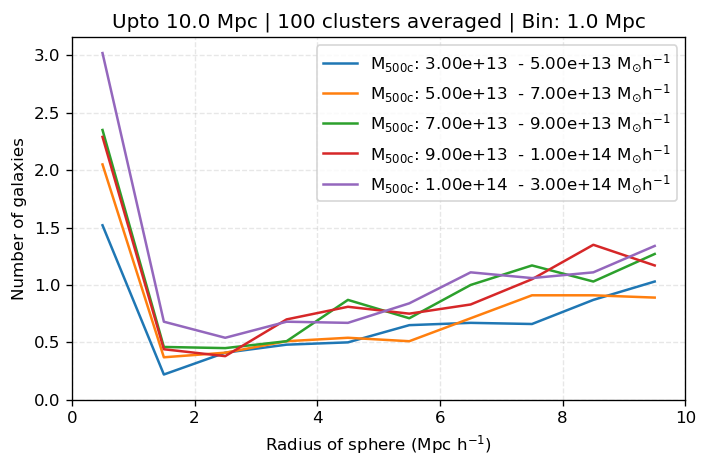

In [37]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 10000
radi = np.arange(0, max_extent + 1, 1000)

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    no_of_gals_bins(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
plt.ylim(0,)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 451 ms, sys: 649 ms, total: 1.1 s
Wall time: 1min 43s


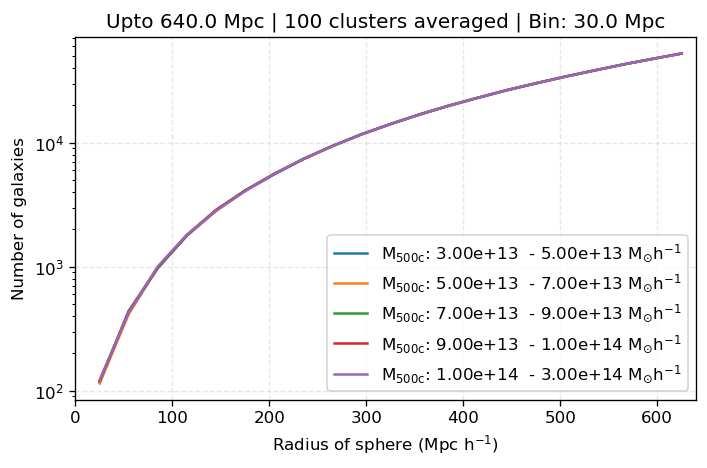

In [60]:
%%time

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
#     no_of_gals_bins(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
#                                     df_clusters_center[
#                                     (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
#                                     (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
#                                     radi, max_extent)
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    
# clus_param = list(zip(df_clusters_center['x[kpc/h]'], df_clusters_center['y[kpc/h]'], df_clusters_center['z[kpc/h]'], 
#                               [delta_gal_mean]*no_of_clus, [cell_size]*no_of_clus, 
#                               [vel_terms]*no_of_clus, [sigma_in_pix]*no_of_clus,
#                               [clus_cube_size]*no_of_clus, [df_gal_padded]*no_of_clus))
# print(param_list)
pool = multi.Pool(processes = cores)
results = pool.starmap(no_of_gals_bins, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    gal_no_mean, low_lim, upper_lim = result
    
    plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, gal_no_mean, 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

In [21]:
def no_of_gals(gray_shade, low_lim, upper_lim, df_clusters_inner, radi, max_extent):
    
        
    v_disp = np.zeros((n_clusters, radi.shape[0]))
    gal_no = np.zeros((n_clusters, radi.shape[0]))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, random_state = 0)    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                                        df_gal_cube['y_shift[kpc/h]']**2 +
                                                        df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi):

            df_gal_sphere = df_gal_cube[df_gal_cube['dist_from_clus'] <= r]
            
            gal_no[j,i] = len(df_gal_sphere)

    
    plt.plot(radi/1e3, gal_no.mean(axis = 0), 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
    

CPU times: user 3min 2s, sys: 2.12 s, total: 3min 5s
Wall time: 1min 17s


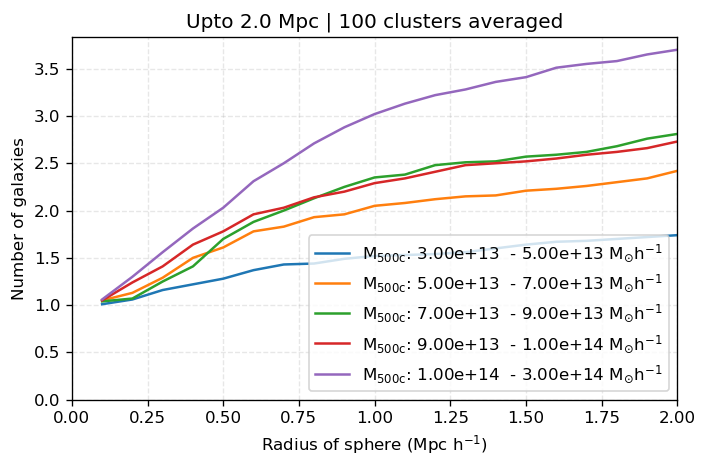

In [32]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(100, max_extent + 1, 100)

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    no_of_gals(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
plt.ylim(0,)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 34.9 s, sys: 962 ms, total: 35.9 s
Wall time: 17.1 s


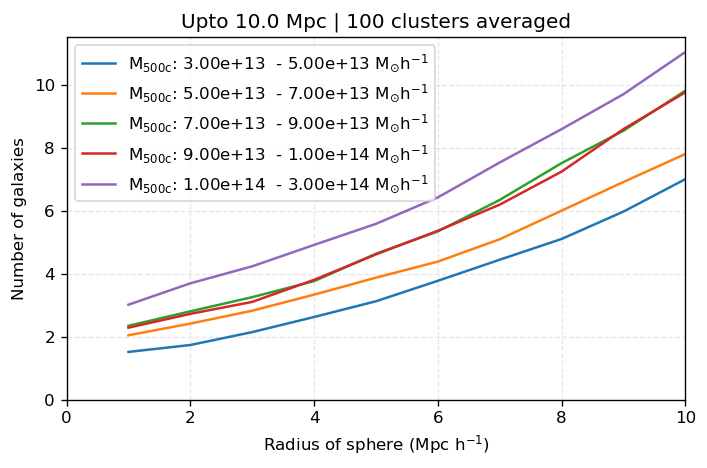

In [23]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 10000
radi = np.arange(1000, max_extent + 1, 1000)

n_clusters = 100
# n_clusters = 2

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    no_of_gals(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
plt.ylim(0, )
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 2h 18min 5s, sys: 6min 56s, total: 2h 25min 1s
Wall time: 2min 53s


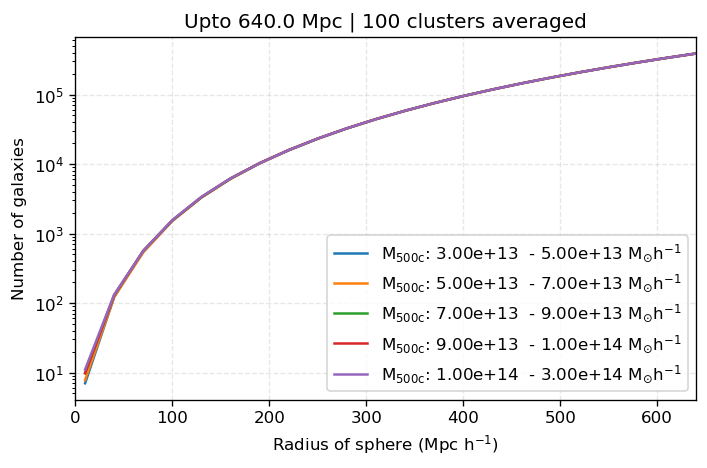

In [24]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)

n_clusters = 100
# n_clusters = 2

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    no_of_gals(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

In [17]:
def mass_profile(gray_shade, low_lim, upper_lim, df_clusters_inner, radi, max_extent):

    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
        
    v_bulk_mag = np.zeros((n_clusters, radi.shape[0]))
    avg_mass = np.zeros((n_clusters, radi.shape[0]-1))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, random_state = 0)    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                                        df_gal_cube['y_shift[kpc/h]']**2 +
                                                        df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi[:-1]):

            df_gal_sphere = df_gal_cube[(df_gal_cube['dist_from_clus'] > radi[i]) & 
                                        (df_gal_cube['dist_from_clus'] < radi[i+1])]
            
            if len(df_gal_sphere) == 0:
                avg_mass[j, i] = 0
            
            else:
                avg_mass[j, i] = np.mean(df_gal_sphere['m[Msol/h]'])
            
#             print(df_gal_sphere['m[Msol/h]'].mean())
    
    

#     print(avg_mass.mean(axis = 0))
    
    plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, avg_mass.mean(axis = 0), 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')

CPU times: user 33.1 s, sys: 741 ms, total: 33.9 s
Wall time: 16.1 s


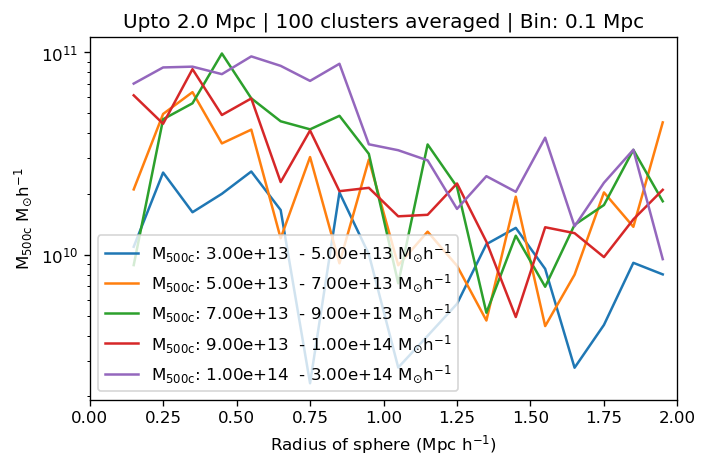

In [18]:
%%time

plt.figure(dpi = dpi)
# plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(100, max_extent + 1, 100)

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    mass_profile(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                df_clusters_center[
                (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('M$_{500\mathrm{c}}$ M$_{\odot}$h$^{-1}$')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 31.3 s, sys: 936 ms, total: 32.3 s
Wall time: 13.1 s


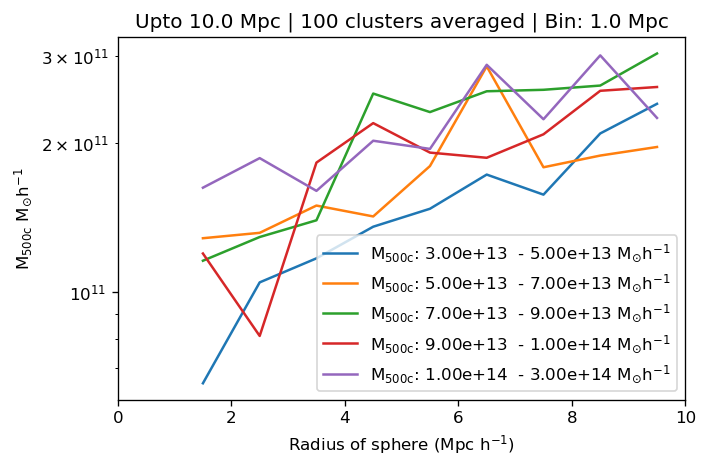

In [19]:
%%time

plt.figure(dpi = dpi)
# plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 10000
radi = np.arange(1000, max_extent + 1, 1000)

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    mass_profile(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                df_clusters_center[
                (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('M$_{500\mathrm{c}}$ M$_{\odot}$h$^{-1}$')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 1h 20min 8s, sys: 4min 9s, total: 1h 24min 18s
Wall time: 1min 43s


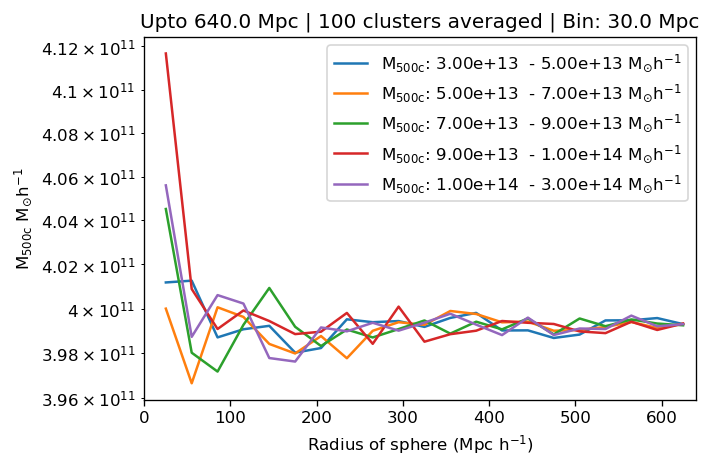

In [20]:
%%time

plt.figure(dpi = dpi)
# plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    mass_profile(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                df_clusters_center[
                (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('M$_{500\mathrm{c}}$ M$_{\odot}$h$^{-1}$')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')